# Data Science Salaries Dataset

This dataset was aggregated from the ai-jobs.net Salaries, and can be obtained from the Kaggle website: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


## Content of the dataset as follows:

- **work_year** - The year the salary was paid.
- **experience_level** : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- **employment_type** : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- **job_title** : The role worked in during the year.
- **salary** : The total gross salary amount paid.
- **salary_currency** : The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd** : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence** : Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio** : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- **company_location** : The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size** : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

As Data Science positions have been on a steady rise in the past decade, I will use this dataset to explore the salaries in the domain during the COVID 19 pandemic.

**The structure of the notebook:**

+ Imports
+ Data
+ Basic EDA
    1. Missing Values
    2. Quantative Data
    3. Qualitative Data

## Potentialy Actionable insights

* Salary ranges between different positions analysis
* Salary increase/decrease during pandemic
* Relationship between remote/onsite work and salary ranges
* Relationship between the salary range in diffent coutries

## Usability for an end-user

* Potential for a streamlit app that predicts your DS salary based on job position, location

# Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# Data

In [2]:
#loading data

salaries_domain = pd.read_csv('data/ds_salaries_domain.csv', index_col=0, sep = ";")

# Basic EDA

In [3]:
salaries_domain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   domain              607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(4), object(8)
memory usage: 61.6+ KB


In [4]:
salaries_domain.head()

,work_year,experience_level,employment_type,job_title,domain,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,Data Science,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,Machine Learning Engineering,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,Data Engineering,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,Data Analysis,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,Machine Learning Engineering,150000,USD,150000,US,50,US,L


In [5]:
salaries_domain.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


### Missing Values

In [6]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', salaries_domain.isnull().values.sum())
print('Percent of missing values per feature: ') 
salaries_domain.isnull().sum() * 100 / len(salaries_domain)

Number of missing values:  0
Percent of missing values per feature: 


work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
domain                0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

### 3.2 Quantative Data

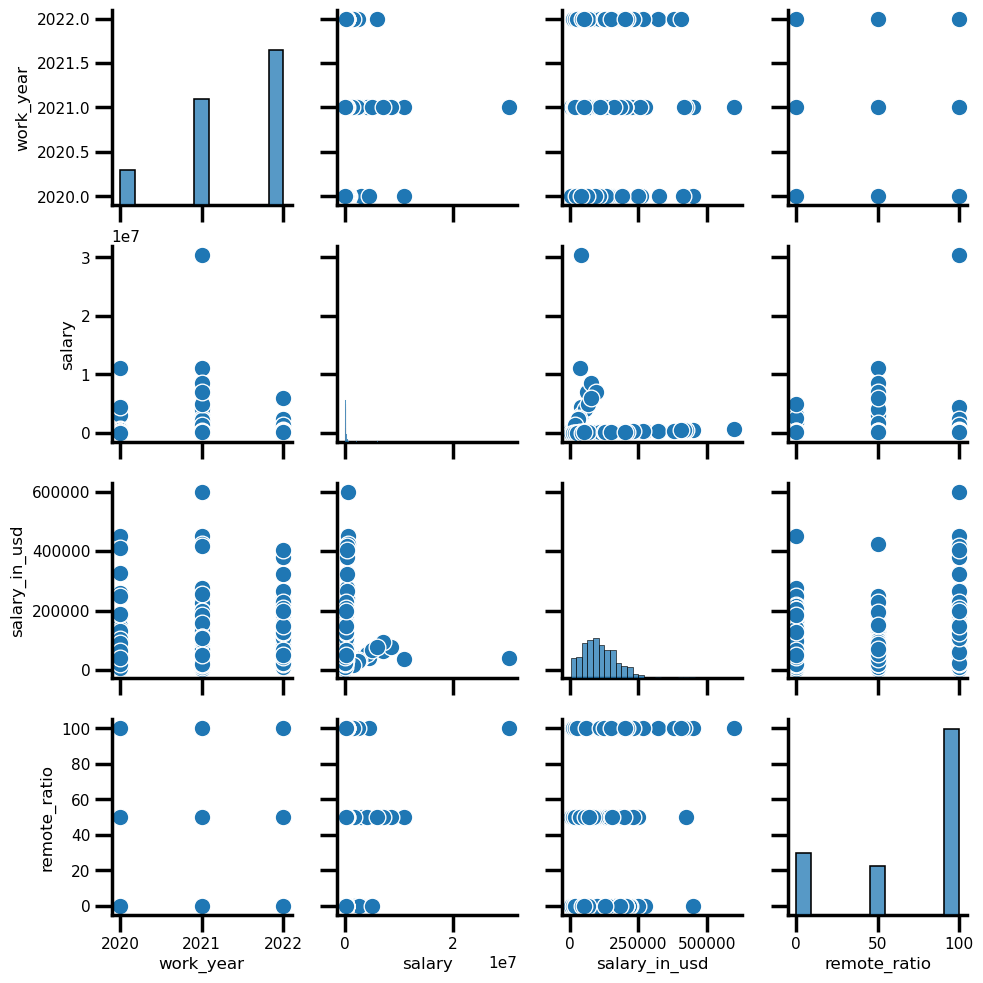

In [7]:
sns.pairplot(salaries_domain[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']]);

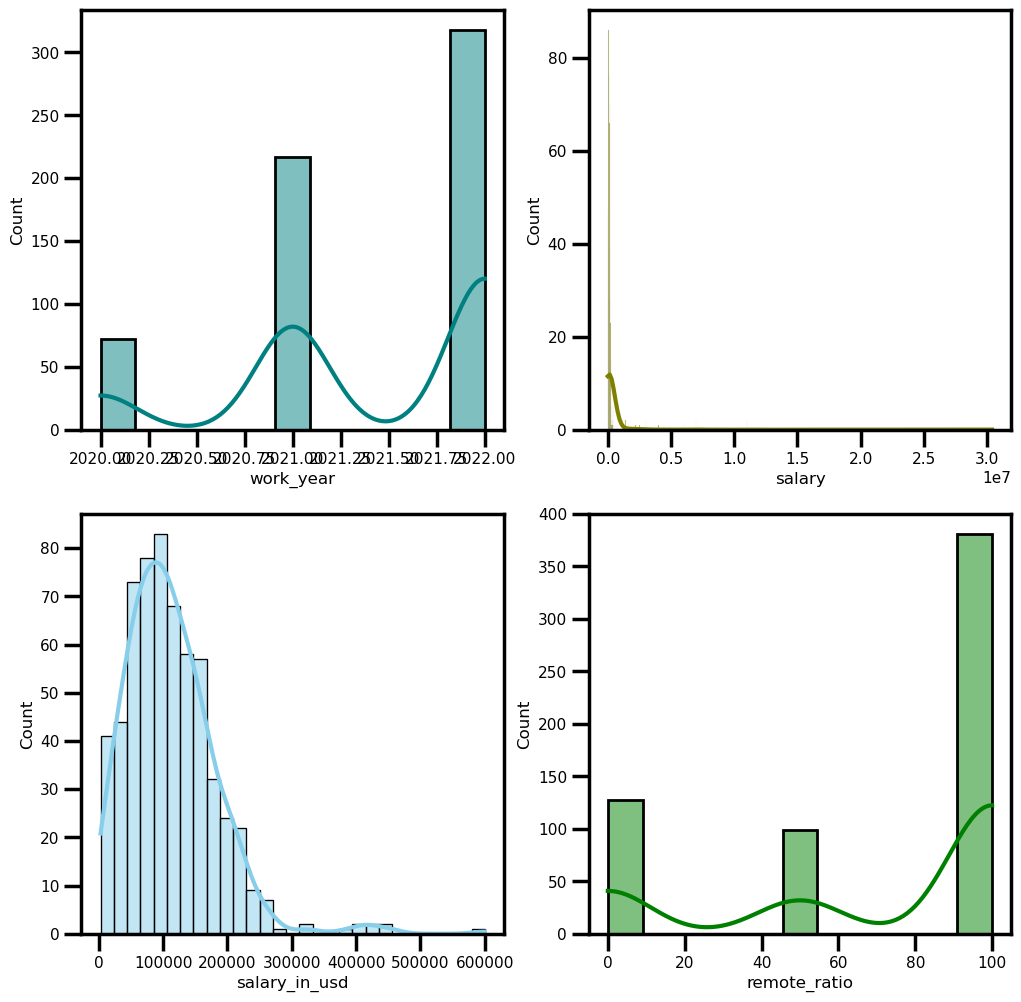

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data = salaries_domain, x = "work_year", kde = True, color = "teal", ax = axs[0,0])
sns.histplot(data = salaries_domain, x = "salary", kde = True, color = "olive", ax = axs[0,1])
sns.histplot(data = salaries_domain, x = "salary_in_usd", kde = True, color = "skyblue", ax = axs[1,0])
sns.histplot(data = salaries_domain, x = "remote_ratio", kde = True, color = "green", ax = axs[1,1])

plt.show();

### 3.3 Qualitative Data

In [9]:
salaries_domain.select_dtypes(exclude='number')

,experience_level,employment_type,job_title,domain,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,Data Science,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,Machine Learning Engineering,USD,JP,JP,S
2,SE,FT,Big Data Engineer,Data Engineering,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,Data Analysis,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,Machine Learning Engineering,USD,US,US,L
...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,Data Engineering,USD,US,US,M
603,SE,FT,Data Engineer,Data Engineering,USD,US,US,M
604,SE,FT,Data Analyst,Data Analysis,USD,US,US,M
605,SE,FT,Data Analyst,Data Analysis,USD,US,US,M


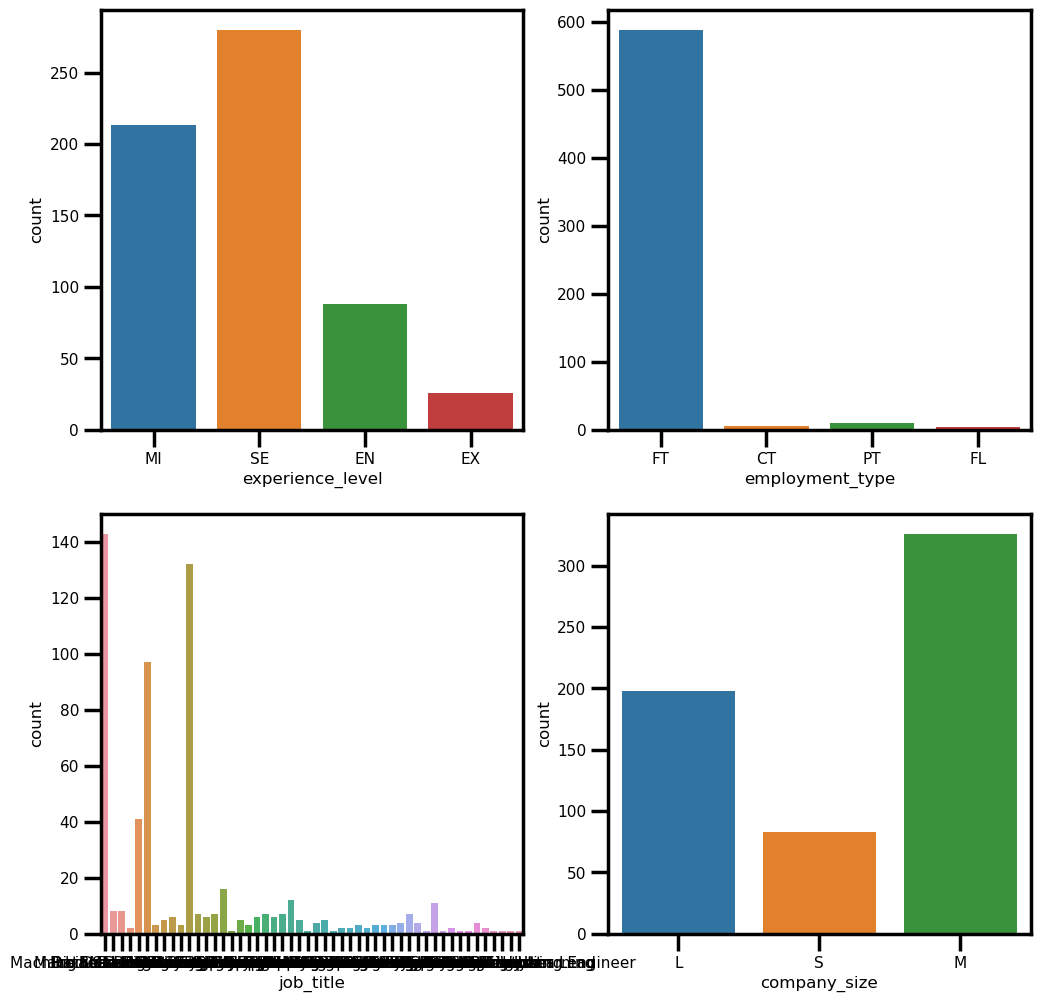

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.countplot(data = salaries_domain, x = "experience_level", ax = axs[0,0])
sns.countplot(data = salaries_domain, x = "employment_type", ax = axs[0,1])
sns.countplot(data = salaries_domain, x = "job_title", ax = axs[1,0])
sns.countplot(data = salaries_domain, x = "company_size", ax = axs[1,1])

plt.show();

In [11]:
salaries_domain.value_counts('job_title')

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist        

In [12]:
salaries_domain.value_counts('domain')

domain
Data Science                    214
Data Engineering                178
Data Analysis                   134
Machine Learning Engineering     64
Research                         17
dtype: int64